# import das bibliotecas

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from scipy import signal
from glob import glob
from scipy import stats

rcParams['figure.figsize'] = [16., 5.]

### Filtros

In [2]:
# definições de filtros

def butter_bandpass(data, lowcut, highcut, fs=200, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='bandpass')
    return signal.filtfilt(b, a, data)

def butter_lowpass(data, lowcut, fs=200, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    b, a = signal.butter(order, low, btype='lowpass')
    return signal.filtfilt(b, a, data)

def butter_highpass(data, highcut, fs=200, order=4):
    nyq = fs * 0.5
    high = highcut / nyq
    b, a = signal.butter(order, high, btype='highpass')
    return signal.filtfilt(b, a, data)

def butter_notch(data, cutoff, var=1, fs=200, order=4):
    nyq = fs * 0.5
    low = (cutoff - var) / nyq
    high = (cutoff + var) / nyq
    b, a = signal.iirfilter(order, [low, high], btype='bandstop', ftype="butter")
    return signal.filtfilt(b, a, data)

### Carregando Dados

In [3]:
# def plotData(dirs):
#     data = np.load("datasets/topicos_cc/"+dirs)
#     data = np.transpose(data, (0, 2, 1))
#     print(data.shape)
#     data_filtered = butter_notch(data, 60)
#     data_filtered = butter_highpass(data_filtered, 5)
#     data_filtered = butter_lowpass(data_filtered, 50)
#     for i in range(data_filtered.shape[1]):
#         plt.plot(data_filtered[0,i,:])
#     plt.suptitle(dirs)
#     plt.show()


In [4]:
def loadSujeito(dirs):
    data = np.load("datasets/topicos_cc/"+dirs)
    data = np.transpose(data, (0, 2, 1))
    data_filtered = butter_notch(data, 60)
    data_filtered = butter_highpass(data_filtered, 5)
    data_filtered = butter_lowpass(data_filtered, 50)
    
    return data_filtered

In [5]:
dirs = [ i.split("/")[-1] for i in glob('datasets/topicos_cc/p1*')]
data = []
for d in dirs:
    data.append(loadSujeito(d))

In [6]:
data_array = np.array(data)

In [7]:
data_array.shape

(3, 8, 4, 1600)

### Visualizando

In [8]:
# for d in dirs:
#     plotData(d)


# Concatenando Trials x Movimentos

In [72]:
from itertools import permutations
import numpy as np
perm = permutations([0, 1, 2])


In [71]:
for i in perm:
    print(i)

(0, 1, 2)
(0, 2, 1)
(1, 0, 2)
(1, 2, 0)
(2, 0, 1)
(2, 1, 0)


In [73]:

X_entrada = data_array[0]

X = []
X.append(data_array[1])
X.append(data_array[2])
X = np.array(X)

X = np.concatenate((np.array(X)), axis=0)


((16, 4, 1600), (8, 4, 1600))

In [ ]:
teste = [] 
treino = []

In [76]:
dados = []

In [77]:
for i in perm:
    
    X_entrada = data_array[i[0]]

    X = []
    X.append(data_array[i[1]])
    X.append(data_array[i[2]])
    X = np.array(X)

    X = np.concatenate((np.array(X)), axis=0)
    dados.append( (X_entrada, X) )
    

In [91]:
dados[0][0].shape, dados[0][1].shape

((8, 4, 1600), (16, 4, 1600))

## Segmentação dos dados

In [11]:
from scipy.signal import stft

def segmentacao(X):
    data = X
    step = 11.8
    segment = 128
    # data = X.reshape(24, 4, 1600)
    # print('', data.shape)

    n_win = int((data.shape[-1] - segment) / step) + 1
    ids = np.arange(n_win) * int(step)

    # Janelas do dado no dominio do tempo
    chunks_time = np.array([data[:,:,k:(k + segment)] for k in ids]).transpose(1, 2, 0, 3)

    # Janelas do dado no domínio da frequência
    _, _, chunks_freq = stft(data, fs=200, nperseg=128, noverlap=115)
    chunks_freq = np.swapaxes(chunks_freq, 2, 3)

    print('Formato (shape) dos dados depois da divisão de janelas')
    print(f'Dominio do tempo: {chunks_time.shape} - (classes+ensaios, canais, janelas, linhas)')
    print(f'Dominio da frequência:  {chunks_freq.shape} - (classes+ensaios, canais, janelas, linhas)')
    return chunks_time, chunks_freq


In [95]:
chunks_teste = []
chunks_treino = []

for d in dados:
    chunks_time_teste, chunks_freq_teste = segmentacao(d[0])
    chunks_time, chunks_freq = segmentacao(d[1])
    print()
    chunks_teste.append((chunks_time_teste, chunks_freq_teste))
    chunks_treino.append((chunks_time, chunks_freq))
    

Formato (shape) dos dados depois da divisão de janelas
Dominio do tempo: (8, 4, 125, 128) - (classes+ensaios, canais, janelas, linhas)
Dominio da frequência:  (8, 4, 125, 65) - (classes+ensaios, canais, janelas, linhas)
Formato (shape) dos dados depois da divisão de janelas
Dominio do tempo: (16, 4, 125, 128) - (classes+ensaios, canais, janelas, linhas)
Dominio da frequência:  (16, 4, 125, 65) - (classes+ensaios, canais, janelas, linhas)

Formato (shape) dos dados depois da divisão de janelas
Dominio do tempo: (8, 4, 125, 128) - (classes+ensaios, canais, janelas, linhas)
Dominio da frequência:  (8, 4, 125, 65) - (classes+ensaios, canais, janelas, linhas)
Formato (shape) dos dados depois da divisão de janelas
Dominio do tempo: (16, 4, 125, 128) - (classes+ensaios, canais, janelas, linhas)
Dominio da frequência:  (16, 4, 125, 65) - (classes+ensaios, canais, janelas, linhas)

Formato (shape) dos dados depois da divisão de janelas
Dominio do tempo: (8, 4, 125, 128) - (classes+ensaios, cana

In [116]:

chunks_teste[0][0].shape , chunks_treino[0][0].shape # chunks_time
chunks_teste[0][1].shape , chunks_treino[0][1].shape # chunks_freq

((8, 4, 125, 65), (16, 4, 125, 65))

## Achar as Janelas
O mesmo que a função acima, mas generico

In [14]:
# from scipy.signal import stft

# def janela(overl=64):
    
#     for i in np.arange(1, 128, 0.1):
#         step = i
#         segment = 128
#         data = X.reshape(24, 4, 1600)
        
#         _, _, chunks_freq = stft(data, fs=200, nperseg=128, noverlap=overl)
#         chunks_freq = np.swapaxes(chunks_freq, 2, 3)
#         window = chunks_freq.shape[2] 

#         n_win = int((data.shape[-1] - segment) / step) + 1
#         ids = np.arange(n_win) * int(step)

#         # Janelas do dado no dominio do tempo
#         chunks_time = np.array([data[:,:,k:(k + segment)] for k in ids]).transpose(1, 2, 0, 3)
#         time_window = chunks_time.shape[2]
            
#         if( time_window == window ):
#             return step
        
    
# step = janela(overl=64)
# print(step)

In [15]:
# all_steps = []
# for i in [0.5, 0.7, 0.8, 0.9 ]:
#     n_step = int(128*i)
#     print(n_step)
#     step = janela(overl=n_step)
#     all_steps.append(step)
    
# all_steps

In [16]:
# from scipy.signal import stft

# def time_freq(step):
    
#     segment = 128
#     data = X.reshape(24, 4, 1600)
#     print('', data.shape)

#     n_win = int((data.shape[-1] - segment) / step) + 1
#     ids = np.arange(n_win) * int(step)

#     # Janelas do dado no dominio do tempo
#     chunks_time = np.array([data[:,:,k:(k + segment)] for k in ids]).transpose(1, 2, 0, 3)

#     # Janelas do dado no domínio da frequência
#     _, _, chunks_freq = stft(data, fs=200, nperseg=128, noverlap=64)
#     chunks_freq = np.swapaxes(chunks_freq, 2, 3)

#     print('Formato (shape) dos dados depois da divisão de janelas')
#     print(f'Dominio do tempo: {chunks_time.shape} - (classes+ensaios, canais, janelas, linhas)')
#     print(f'Dominio da frequência:  {chunks_freq.shape} - (classes+ensaios, canais, janelas, linhas)')
#     return chunks_time, chunks_freq

In [17]:
# chunks_time , chunks_freq = time_freq(11.8)

## Extração e seleção de características

In [18]:
def getZC(data, th):
    tamanho = len(data)
    somatoria = 0
    
    for i in range(tamanho-1):
        resultado = (data[i] * data[i+1] )
        resultado2 = np.abs(data[i] - data[i+1])
        if(resultado < 0 ) and (resultado2 > th):
            somatoria += 1
        
    return somatoria

def fj(i, sampleRate, tamanho):
    return i * sampleRate / (2 * tamanho)

def getFMN(data):
    tamanho = len(data)
    somatoria = 0
    sumPSD = np.sum(PSD(data))
    for i in range(tamanho):
        somatoria += (fj(i, 41, tamanho) * PSD(data[i]) ) / sumPSD
        
    return somatoria



In [19]:
from math import prod

# funções auxiliares
def PSD(w):
    ''' definição da função PSD para o sinal no domínio da frequência '''
    return np.abs(w) ** 2

def wamp(x, th):
    res = np.abs(np.diff(x))
    return np.sum(res >= th, axis=-1)

def wl(x):
    res = np.abs(np.diff(x))
    return np.sum(res, axis=-1)

def var(x):
    return np.sum(x ** 2, axis=-1) / (np.prod(x.shape[:-1]) - 1)

def rms(x):
    return np.sqrt(np.sum(np.abs(x) ** 2, axis=-1) / (np.prod(x.shape[:-1])))

def fmd(w):
    return np.sum(PSD(w), axis=-1) / 2

def mmdf(w):
    return np.sum(np.abs(w), axis=-1) / 2

def zc(data,threshold):
    f =[]
    x,y,z = data.shape[:3]
    for xx in range(x):
        fx = []
        for yy in range(y):
            fy = []
            for zz in range(z):
                fy.append( getZC(data[xx][yy][zz], threshold ) )
            fx.append(fy)
        f.append(fx)
    return np.array(f)

def fmn(data):
    f =[]
    x,y,z = data.shape[:3]
    for xx in range(x):
        fx = []
        for yy in range(y):
            fy = []
            for zz in range(z):
                
                fy.append( getFMN(data[xx][yy][zz]) )
                
            fx.append(fy)
        f.append(fx)
    return np.array(f)

def A(w):
    return np.abs(w)

def getMMNF(data):
    tamanho = len(data)
    somatoria = 0
    
    sumA = np.sum(A(data))
    
    for i in range(tamanho):
        somatoria += (fj(i, 200, tamanho) * A(data[i]) ) / sumA 
        
    return somatoria

def mmnf(data):
    f =[]
    x,y,z = data.shape[:3]
    for xx in range(x):
        fx = []
        for yy in range(y):
            fy = []
            for zz in range(z):
                
                fy.append( getMMNF(data[xx][yy][zz]) )
                
            fx.append(fy)
        f.append(fx)
    return np.array(f)

def logD(data):
    from math import e
    N = np.prod(data.shape)
    
    return e ** ( np.sum(np.log10( np.abs(data) ), axis=-1) ) / N

def iemg(data):
    # tempo
    return np.sum(A(data), axis=-1)

def dasdv(data):
    #tempo
    return np.sqrt( np.sum(np.diff(data) ** 2, axis=-1) / (np.prod(data.shape[:-1]) - 1) )

def tmx(x, n):
    N = np.prod(x.shape[:-1])
    return np.abs(np.sum(x ** n, axis=-1) / N)

## Implementação do vetor

In [20]:
def final_filtros(chunks_time, chunks_freq, data):
    th = np.median(chunks_time)
    #VAR, RMS, WL, TM5 e DASDV
    #WL, IEMG, LOGD
    final_data = list()
    final_data.append(var(chunks_time))
    final_data.append(rms(chunks_time))
    final_data.append(wamp(chunks_time, th))
    final_data.append(logD(chunks_time))
    final_data.append(wl(chunks_time))
    final_data.append(zc(chunks_time,0))

    final_data.append(iemg(chunks_time))
    final_data.append(dasdv(chunks_time))
    final_data.append(tmx(chunks_time, 3))
    final_data.append(tmx(chunks_time, 4))
    final_data.append(tmx(chunks_time, 5))

    final_data.append(fmd(chunks_freq))
    final_data.append(mmdf(chunks_freq))
    final_data.append(fmn(chunks_freq))
    final_data.append(mmnf(chunks_freq))

    f, Pxx_den = signal.welch(data, fs=200, nperseg=248, noverlap=223)
    final_data.append(Pxx_den)
    final = np.array(final_data)
    print("SHAPE-: ",final.shape)

    return final
  

In [124]:
len(chunks_teste) # Combinações
len(chunks_teste[0]) # Chunks_time e Chunks_freq
chunks_teste[0][0].shape # Chunks_Time
chunks_teste[0][1].shape # Chunks_Freq

(8, 4, 125, 65)

5

In [132]:
finais = []
for teste, treino, X in zip(chunks_teste,chunks_treino, dados):
    final = final_filtros(treino[0], treino[1], X[1])
    final_entrada = final_filtros(teste[0], teste[1], X[0])
    finais.append((final_entrada, final))

SHAPE-:  (16, 16, 4, 125)
SHAPE-:  (16, 8, 4, 125)
SHAPE-:  (16, 16, 4, 125)
SHAPE-:  (16, 8, 4, 125)
SHAPE-:  (16, 16, 4, 125)
SHAPE-:  (16, 8, 4, 125)
SHAPE-:  (16, 16, 4, 125)
SHAPE-:  (16, 8, 4, 125)
SHAPE-:  (16, 16, 4, 125)
SHAPE-:  (16, 8, 4, 125)


In [137]:
finais[0][0].shape, finais[0][1].shape
# Final_entrada, Final
#chunks_teste[0][0].shape , chunks_treino[0][0].shape 

((16, 8, 4, 125), (16, 16, 4, 125))

In [138]:
# final = final_filtros(chunks_time, chunks_freq, X)


In [140]:
# final_entrada = final_filtros(chunks_time_entrada, chunks_freq_entrada, X_entrada)

# final.shape, final_entrada.shape

In [24]:
# data = final.transpose(0, 1, 3, 2)
# sh = data.shape

# X = data.reshape(sh[0], int(sh[1]/3), 3 * sh[2], sh[3])

# print(X.shape)

## PCA


In [142]:
from sklearn.decomposition import PCA

In [26]:
# pca = PCA(n_components=2)

# features = list()
# for f in X:
#     classes = list()
#     for c in f:
#         C_pca = pca.fit_transform(c)
#         classes.append(C_pca)
#     features.append(classes)

# X_pca = np.array(features)

In [27]:
# X_pca.shape

## Visualização

In [28]:
# def plot_features(features, features_names, classes_names, ch_1, ch_2):
    
#     movs = np.arange(len(classes_names))
#     markers = ["o", "v", "^", "P", "*", "x", "X", "2", "3", "1", 'm', 'L', 'z', 'U', '6']
#     for f, feature in enumerate(features):
        
#         for mov, marker in zip(movs, markers):
#             # argumentos: classes, amostras, canal
#             plt.scatter(feature[mov, :, ch_1],
#                         feature[mov, :, ch_2], marker=marker)

#         plt.legend((classes_names), scatterpoints=1, loc='best',
#                    ncol=3, fontsize=8)
        
#         plt.title(features_names[f])
#         plt.xlabel('CH{}'.format(ch_1))
#         plt.ylabel('CH{}'.format(ch_2))
#         plt.show()


In [29]:


# import matplotlib.pyplot as plt
# from matplotlib import rcParams

# plt.rcParams["figure.figsize"] = (12, 12)

# features_name = ('var', 'rms', 'wamp', 'wl', 'zc','logd', 'iemg','dasdv','tm3','tm4','tm5', 'fmd', 'mmdf', 'fmn', 'mmnf')
# classes = [str(item) for item in list(range(8))]
# plot_features(X_pca, features_name, classes, 0, 1)


## Transpose para Selecionar Feature

In [143]:
final.shape
# 24*26 ,9, 4
# 24*26 , 10, 4
# 24*26 , 15, 4

(16, 16, 4, 125)

In [31]:
final.shape

(16, 16, 4, 125)

In [32]:
data = final.transpose(1, 3, 2, 0)
X = data.reshape(data.shape[0]*data.shape[1], data.shape[2]*data.shape[3])
X.shape

(2000, 64)

In [147]:
finais[0][0].shape, finais[0][1].shape
# Final_entrada, Final

X_All = []

for f in finais:
    data_entrada = f[0].transpose(1, 3, 2, 0)
    data = f[1].transpose(1, 3, 2, 0)
    
    X_entrada = data_entrada.reshape(data_entrada.shape[0]*data_entrada.shape[1], data_entrada.shape[2]*data_entrada.shape[3])
    X = data.reshape(data.shape[0]*data.shape[1], data.shape[2]*data.shape[3])
    
    X_All.append( (X_entrada, X) )

In [149]:
#X_All #(X_entrada, X)


In [150]:
len(X_All)

5

In [151]:
# y = np.array(list(range(1, 9)) * int(X.shape[0] / 8)) # Antigo
y_all = []
for X in X_All:
    y_entrada = [ [(i)] * int(X[0].shape[0] / 8 ) for i in range(8)]
    y_entrada = np.array(y_entrada).flatten()
    
    y = [ [(i)] * int(X[1].shape[0] / 8 ) for i in range(8)]
    y = np.array(y).flatten()
    y_all.append( (y_entrada, y) )

In [ ]:
y_all # (y_entrada, y)

## Seleção de características

## Variance Threshold


In [34]:
# # teste

# data_t = final.transpose(1, 3, 2, 0)
# ## X_t = data.reshape(24*26, 9, 4)
# ## X_t = data.reshape(24*26, 10, 4)
# ## X_t = data.reshape(24*26, 15, 4)
# X_t = data.reshape(24*26, 5, 4)

# data_t = X_t.transpose(2, 0, 1)
# data_t.shape


In [35]:
# from sklearn.feature_selection import VarianceThreshold
# canais = list()

# for c in data_t:
#     sel = VarianceThreshold(threshold=(.1))
#     vt = sel.fit_transform(c)
#     canais.append(vt)


### RFE (Por causa do Kernel Linear não iremos utilizar)

In [36]:
# from sklearn.feature_selection import RFE
# from sklearn.svm import SVC
# estimator = SVC(kernel="linear")
# selector = RFE(estimator, n_features_to_select=5, step=1)
# selector = selector.fit(X, y)
# s = selector.fit_transform(X, y)

### GenericUnivariateSelect

In [37]:
# X.shape, y.shape

In [38]:
# from sklearn.feature_selection import GenericUnivariateSelect, chi2
# transformer = GenericUnivariateSelect(chi2, mode='k_best', param=10)
# X_new = transformer.fit_transform(X, y)
# X_new.shape

In [39]:
# from sklearn.feature_selection import SelectKBest
# X_new = SelectKBest(k=10).fit_transform(X, y)

In [40]:
# X.shape, X_new.shape

## Normalização

In [152]:
#X_All #(X_entrada, X)
#y_all # (y_entrada, y)

from sklearn.preprocessing import StandardScaler


X_train_norm = scaler.fit_transform(X_All[0][1])
X_test_norm = scaler.fit_transform(X_All[0][0])

# X_new_norm = scaler.fit_transform(X_new)

## SVM

In [167]:
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn import metrics

def do_svm2(X,y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True)

    clf = SVC(gamma='scale')
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    
    acc = metrics.accuracy_score(y_test, y_pred)
    
    return acc

def do_svm(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    clf = SVC(gamma='scale')
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    
    acc = metrics.accuracy_score(y_test, y_pred)
    
    return acc


for x, y in zip(X_All, y_all):
#     print(do_svm(x[1],x[0],y[1], y[0] ))
    print(do_svm2(x[0],y[0]))    

0.09666666666666666
0.1
0.09333333333333334
0.11
0.09


# Combinations

In [43]:
# from itertools import combinations

# best_acc = 0
# best_comb = 0
# for comb in range(1,12):
#     for res in combinations(range(9),comb):
#         acc = do_svm(X_norm.take(res, axis=1), y)

#         if acc > best_acc:
#             best_acc = acc
#             best_comb = res

# print(f"Melhor Acurácia: {best_acc}, Melhor Combinação: {best_comb}")

# features_name = ('var', 'rms', 'wamp', 'wl', 'zc','logd', 'fmd', 'mmdf', 'fmn', 'mmnf')
# for i in best_comb:
#     print(f" {i} --- {features_name[i]}")


In [44]:
# from itertools import combinations

# best_acc = 0
# best_comb = 0
# for comb in range(1,12):
#     for res in combinations(range(9),comb):
#         acc = do_svm(X.take(res, axis=1), y)

#         if acc > best_acc:
#             best_acc = acc
#             best_comb = res

# print(f"Melhor Acurácia: {best_acc}, Melhor Combinação: {best_comb}")

# features_name = ('var', 'rms', 'wamp', 'wl', 'zc','logd', 'fmd', 'mmdf', 'fmn', 'mmnf')
# for i in best_comb:
#     print(f" {i} --- {features_name[i]}")


In [45]:
# from itertools import combinations

# best_acc = 0
# best_comb = 0
# best_k = 0
# for comb in range(1,12):
#     for res in combinations(range(9),comb):
#         for ks in range(1,41):
#             X_new = SelectKBest(k=ks).fit_transform(X, y)
#             acc = do_svm(X_new_norm.take(res, axis=1), y)

#             if acc > best_acc:
#                 best_acc = acc
#                 best_comb = res
#                 best_k = ks

# print(f"Melhor Acurácia: {best_acc}, Melhor Combinação: {best_comb}, Melhor K: {best_k}")




## RNN

In [48]:
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from urllib.request import urlopen, urlretrieve

import matplotlib.pyplot as plt
%matplotlib inline

2022-06-21 19:29:48.249870: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-21 19:29:48.249893: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Divisão dos dados em treino e teste:

In [49]:

# Dividindo em conjuntos de treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, test_size=0.3)

# treino: 80% dos 80% de treino. Validacao: 20% dos 80% de treino.
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.3, shuffle=None, stratify=y_train)


## Aplicação do algoritmo de MLP e geração dos resultados:

In [50]:
# definição de uma fração do regularizador
l = 0.01

# desenvolvimento do modelo Keras para uma MLP
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=64,
                kernel_regularizer=regularizers.l2(l)))
# Aplicação de um dropout (caso necessário)
# model.add(Dropout(0.5))
model.add(Dense(10, activation='relu',
                kernel_regularizer=regularizers.l2(l)))
# Aplicação de um dropout (caso necessário)
# model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

# Aplicação de um modelo de descida de gradiente utilizando o Stocastic Gradient Descendent (SGD)
sgd = SGD(lr=0.05, momentum=0.0)
# Função de otimização da rede: ADAM
adam = Adam(lr=0.005, beta_1=0.9, beta_2=0.999)
# Função de custo baseada em dados originalmente categóricos
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam,
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=15,
                    validation_data=(X_val, y_val))

#Dro_out, batch_size, epoch, sgd, adam e l2

Epoch 1/100


2022-06-21 19:30:00.469067: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-21 19:30:00.469086: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-21 19:30:00.469103: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (debian): /proc/driver/nvidia/version does not exist
2022-06-21 19:30:00.469278: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/alunos/a1858351/Documentos/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: 

66/66 [==============================] - 1s 3ms/step - loss: 2.2770 - accuracy: 0.2327 - val_loss: 1.9685 - val_accuracy: 0.4119
Epoch 2/100
66/66 [==============================] - 0s 2ms/step - loss: 1.8469 - accuracy: 0.4020 - val_loss: 1.7180 - val_accuracy: 0.4429
Epoch 3/100
66/66 [==============================] - 0s 2ms/step - loss: 1.6308 - accuracy: 0.4816 - val_loss: 1.6119 - val_accuracy: 0.4548
Epoch 4/100
66/66 [==============================] - 0s 2ms/step - loss: 1.5028 - accuracy: 0.5214 - val_loss: 1.4812 - val_accuracy: 0.5214
Epoch 5/100
66/66 [==============================] - 0s 2ms/step - loss: 1.4057 - accuracy: 0.5765 - val_loss: 1.4026 - val_accuracy: 0.5548
Epoch 6/100
66/66 [==============================] - 0s 2ms/step - loss: 1.3548 - accuracy: 0.6082 - val_loss: 1.3522 - val_accuracy: 0.5833
Epoch 7/100
66/66 [==============================] - 0s 2ms/step - loss: 1.2974 - accuracy: 0.6194 - val_loss: 1.3090 - val_accuracy: 0.5881
Epoch 8/100
66/66 [======

Epoch 59/100
66/66 [==============================] - 0s 1ms/step - loss: 0.6399 - accuracy: 0.9255 - val_loss: 0.7764 - val_accuracy: 0.8667
Epoch 60/100
66/66 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.9000 - val_loss: 0.8231 - val_accuracy: 0.8238
Epoch 61/100
66/66 [==============================] - 0s 2ms/step - loss: 0.6607 - accuracy: 0.9051 - val_loss: 0.8452 - val_accuracy: 0.8405
Epoch 62/100
66/66 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.8918 - val_loss: 0.8438 - val_accuracy: 0.8548
Epoch 63/100
66/66 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.9061 - val_loss: 0.7912 - val_accuracy: 0.8548
Epoch 64/100
66/66 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.9245 - val_loss: 0.7866 - val_accuracy: 0.8476
Epoch 65/100
66/66 [==============================] - 0s 2ms/step - loss: 0.6402 - accuracy: 0.9061 - val_loss: 0.7901 - val_accuracy: 0.8476
Epoch 

In [51]:
# 
# score = model.predict_classes(X_test)
# y_true = [np.where(x == 1)[0][0] for x in y_test]

predict_x=model.predict(X_test) 
score=np.argmax(predict_x,axis=1)
y_true = y_test

print('Acurácia: %0.2f%%' % (accuracy_score(y_true, score) * 100))
print('Matriz de confusão:')
print(confusion_matrix(y_true, score))
print()
print(classification_report(y_true, score, digits=5))

19/19 [==============================] - 0s 803us/step
Acurácia: 78.00%
Matriz de confusão:
[[70  2  0  1  6  1  0  0]
 [ 6 56  3  0  0  6  1  1]
 [ 1  6 63  1  0  4  3  0]
 [ 7  4  9 44  0  2  0  6]
 [ 8  1  0  2 48 11  0  4]
 [ 6  2  3  0  3 61  1  0]
 [ 1  0  5  4  0  2 61  0]
 [ 0  0  6  0  3  0  0 65]]

              precision    recall  f1-score   support

           0    0.70707   0.87500   0.78212        80
           1    0.78873   0.76712   0.77778        73
           2    0.70787   0.80769   0.75449        78
           3    0.84615   0.61111   0.70968        72
           4    0.80000   0.64865   0.71642        74
           5    0.70115   0.80263   0.74847        76
           6    0.92424   0.83562   0.87770        73
           7    0.85526   0.87838   0.86667        74

    accuracy                        0.78000       600
   macro avg    0.79131   0.77828   0.77916       600
weighted avg    0.78921   0.78000   0.77900       600



# Grafico

In [52]:
def plot_history(h):
    loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Custo não está presente no histórico')
        return
    epochs = range(1, len(history.history[loss_list[0]]) + 1)
    # Custo
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Custo [treinamento] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Custo [validação] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    plt.title('Custo')
    plt.xlabel('Épocas')
    plt.ylabel('Custo')
    plt.legend()
    # Acurácia
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Acurácia [treinamento] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    for l in val_acc_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Acurácia [validação] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    plt.title('Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.show()

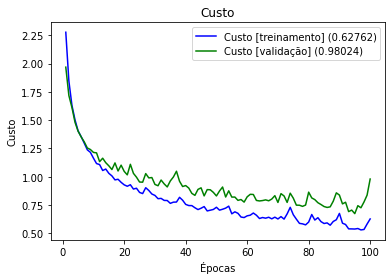

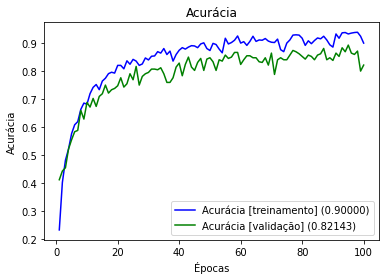

In [53]:
plot_history(history)